In [46]:
import numpy as np
import random
import pandas as pd
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
raw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.tsv',sep = '\t')
sample = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.tsv',sep = '\t')

In [48]:
raw

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [49]:
sample

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [0]:
train,test = train_test_split(raw,test_size = 0.2,random_state = 1234)

In [0]:
best_alpha = [1,2,3,4,5]
final_accuracy_list = []
for a in best_alpha: 
    x = train['Phrase'].values
    y = train['Sentiment'].values
    x_test = test['Phrase'].values
    real_y = test['Sentiment'].values
    count_vect = CountVectorizer()
    x_vector = count_vect.fit_transform(x)
    trans_x_test = count_vect.transform(x_test) 
    accuracy_list = []
    skf = StratifiedKFold(n_splits=5,random_state=np.random.seed(1234), shuffle=True)
    clf_nb = MultinomialNB(alpha = a)
    for train_index, test_index in skf.split(x_vector,y):
        x_train, x_test,y_train, y_test = x_vector[train_index], x_vector[test_index],y[train_index], y[test_index]
        clf_nb.fit(x_train,y_train)
        predict = clf_nb.predict(x_test)
        accuracy = accuracy_score(y_test, predict)
        accuracy_list.append(accuracy)
    final_accuracy_list.append(np.mean(accuracy_list))

In [52]:
final_accuracy_list

[0.6063213022513956,
 0.6097654778749839,
 0.6072504123775877,
 0.6046792738253746,
 0.6002018371422935]

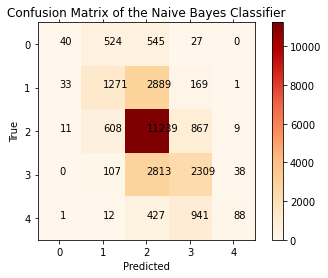

In [53]:
cm = confusion_matrix(y_test, predict)
labels=['0','1','2','3','4']
fig_dtc = plt.figure()
ax_dtc = fig_dtc.add_subplot(111)
cax_dtc = ax_dtc.imshow(cm,cmap='OrRd')
ax_dtc.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=False)
plt.title('Confusion Matrix of the Naive Bayes Classifier')
fig_dtc.colorbar(cax_dtc)
ax_dtc.set_yticklabels([''] + labels)
ax_dtc.set_xticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j,i, str(cm[i][j]))
plt.show()

In [0]:
x = raw['Phrase'].values
y = raw['Sentiment'].values
x_test = sample['Phrase'].values
count_vect = CountVectorizer()
x_vector = count_vect.fit_transform(x)
trans_x_test = count_vect.transform(x_test)
clf_nb = MultinomialNB(alpha = 2)
clf_nb.fit(x_vector,y)
predict = clf_nb.predict(trans_x_test)

In [0]:
submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sampleSubmission.csv',sep = ',')

In [0]:
submission['Sentiment'] = predict

In [0]:
submission.to_csv('submission.csv',index=False,header = True)
files.download('submission.csv')